20220920
Multilayer perceptron을 이용한 예측
- origin

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import torch


import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('../data_up.csv')
df.head()

,Unnamed: 0,receve comp time,printing start time,printing comp time,cutting start time,cutting comp time,pac time,T1,T2,T3,...,T5,X1,X2,X3,X4,Y0,X1_d1,X3_d1,X1_d2,X3_d2
0,2,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,0.0,0.0,0.0,0.0
1,3,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,0.0,0.0,0.0,0.0
2,4,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,0.0,0.0,0.0,0.0
3,5,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,0.0,0.0,0.0,0.0
4,6,2020-12-08 08:10:00,2020-12-08 08:10:00,2020-12-08 10:30:00,2020-12-08 10:35:00,2020-12-08 11:45:00,2020-12-08 17:10:00,0 days 02:20:00,0 days 00:05:00,0 days 01:10:00,...,0 days 09:00:00,140.0,5.0,70.0,325.0,540.0,0.0,0.0,0.0,0.0


In [19]:
input_data = pd.DataFrame()
input_data[['receve comp time', 'X1','X2','X3', 'X4', 'X1_d1', 'X1_d2', 'X3_d1', 'X3_d2','Y0']] = df[['receve comp time', 'X1','X2','X3', 'X4', 'X1_d1', 'X1_d2', 'X3_d1', 'X3_d2', 'Y0']]
input_data.head(5)

,receve comp time,X1,X2,X3,X4,X1_d1,X1_d2,X3_d1,X3_d2,Y0
0,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,0.0,0.0,0.0,0.0,540.0
1,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,0.0,0.0,0.0,0.0,540.0
2,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,0.0,0.0,0.0,0.0,540.0
3,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,0.0,0.0,0.0,0.0,540.0
4,2020-12-08 08:10:00,140.0,5.0,70.0,325.0,0.0,0.0,0.0,0.0,540.0


In [20]:
# 데이터 프레임.info() 함수는 데이터프레임에 관한 정보
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   receve comp time  16992 non-null  object 
 1   X1                16992 non-null  float64
 2   X2                16992 non-null  float64
 3   X3                16992 non-null  float64
 4   X4                16992 non-null  float64
 5   X1_d1             16992 non-null  float64
 6   X1_d2             16992 non-null  float64
 7   X3_d1             16992 non-null  float64
 8   X3_d2             16992 non-null  float64
 9   Y0                16992 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


X1, X2, X3, X4 의 평균 구하기 추정할 때, 값이 없을 경우 평균으로 입력

In [21]:
X1_mean = df['X1'].mean()
X2_mean = df['X2'].mean()
X3_mean = df['X3'].mean()
X4_mean = df['X4'].mean()
Y0_mean = df['Y0'].mean()

X1_d1_mean = df['X1_d1'].mean()
X1_d2_mean = df['X1_d2'].mean()
X3_d1_mean = df['X3_d1'].mean()
X3_d2_mean = df['X3_d2'].mean()
print('X1 mean={:.2f}, X2 mean={:.2f}, X3 mean={:.2f}, X4 mean={:.2f}'.format(X1_mean, X2_mean, X3_mean, X4_mean))
print('X1_d1 mean={:.2f}, X1_d2 mean={:.2f}, X3_d1 mean={:.2f}, X3_d2 mean={:.2f}'.format(X1_d1_mean, X1_d2_mean, X3_d1_mean, X3_d2_mean))

X1 mean=123.99, X2 mean=5.05, X3 mean=130.89, X4 mean=10.54
X1_d1 mean=-0.01, X1_d2 mean=-0.01, X3_d1 mean=-0.00, X3_d2 mean=-0.00


In [22]:
# 데이터 셋을 target 기준으로 분리. Y0가 예측하려고 하는 값, X1, X2, X3 입력 변수 값
X = df[['X1','X2','X3', 'X4', 'X1_d1', 'X1_d2', 'X3_d1', 'X3_d2']].values
y = df['Y0'].values
print(X.shape, type(X))
print(y.shape, type(y))

(16992, 8) <class 'numpy.ndarray'>
(16992,) <class 'numpy.ndarray'>


In [23]:
# 80% training, 20% test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(13593, 8) (13593,)
(3399, 8) (3399,)


In [39]:
x3_pre = pd.DataFrame(x_test)
x3_pre.columns = ['X1', 'X2', 'X3', 'X4', 'X1_d1','X1_d2', 'X3_d1', 'X3_d2']
x3_pre = x3_pre[['X3']]
x3_push = pd.DataFrame()
x3_push[['X3']] = x3_pre.iloc[:1]
x3_push = x3_push.append(x3_pre)
x3_push = x3_push.iloc[:-1]
x3_push = x3_push['X3'].to_numpy()
x3_push

array([30., 30., 50., ...,  5., 34., 97.])

데이터를 tensor 데이터형으로 변환

In [24]:
x_train_seq = torch.FloatTensor(x_train)
y_train_seq = torch.FloatTensor(y_train).view([-1, 1])
x_test_seq = torch.FloatTensor(x_test)
y_test_seq = torch.FloatTensor(y_test).view([-1, 1])
print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

torch.Size([13593, 8]) torch.Size([13593, 1])
torch.Size([3399, 8]) torch.Size([3399, 1])


data loader 만들기

In [25]:
# 배치 형태로 만들어 주자. 시계열이니까 셔플을 막 하면 안된다
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)  # x_train 과 y_train 은 하나의 TensorDataset 으로 결합
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [26]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import  TensorDataset, DataLoader

모델 만들기

In [27]:
relu = nn.ReLU()
linear1 = nn.Linear(8, 64, bias=True)
linear2 = nn.Linear(64, 512, bias=True)
linear3 = nn.Linear(512, 1024, bias=True)
linear33 = nn.Linear(1024, 2048, bias=True)
linear4 = nn.Linear(2048, 512, bias=True)
linear5 = nn.Linear(512, 32, bias=True)
linear6 = nn.Linear(32, 1, bias=True)

nn.init.xavier_uniform_(linear1.weight)
nn.init.xavier_uniform_(linear2.weight)
nn.init.xavier_uniform_(linear3.weight)
nn.init.xavier_uniform_(linear33.weight)
nn.init.xavier_uniform_(linear4.weight)
nn.init.xavier_uniform_(linear5.weight)
nn.init.xavier_uniform_(linear6.weight)

model = nn.Sequential(
    linear1, relu,
    linear2, relu,
    linear3, relu,
    linear33, relu,
    linear4, relu,
    linear5, relu,
    linear6
)

print(model)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=2048, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2048, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=32, bias=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=1, bias=True)
)


In [28]:
import time
import os
import datetime
import os
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


num_epochs = 1000
batch_size = 50
learning_r = 1e-3
pwd = os.getcwd()
print(pwd)
model_name = os.path.join(pwd,'model/mlp-data_up.model')
figure_name = os.path.join(pwd,'result/mlp-data_up.png')
print(model_name, figure_name)

def training(model, train_dataloader):
    print("\nTraining is Started ")
    model.train()
    criterion = nn.MSELoss()       
    optimizer = optim.Adam(model.parameters(), lr=learning_r)  

    start_time = time.time()
    loss_graph = [] # 그래프 그릴 목적인 loss.
    n = len(train_loader)

    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.
        for data in train_loader:
            seq, target = data
            out = model(seq)  
            loss = criterion(out, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss_graph.append(running_loss / n)
        if epoch % 10 == 0:
            print('[epoch: {}] loss: {:.4f}   Time: {}'.format(epoch, running_loss/n, datetime.datetime.now()))
    plt.figure(figsize=(20,10))
    plt.plot(loss_graph)
    plt.show()
    plt.savefig(figure_name)

    torch.save(model.state_dict(), model_name)
    print('    model_path={} is saved'.format(model_name))
    return


/sharehouse/DATA/SMART_FACTORY/ckim
/sharehouse/DATA/SMART_FACTORY/ckim/model/mlp-data_up.model /sharehouse/DATA/SMART_FACTORY/ckim/result/mlp-data_up.png


In [29]:
# err_range = 10.  # error range in hit ratio
def testing(model, test_loader, err_range): # all values / Y0
    print("\nTesting is Started ")

    model.eval()
    model.load_state_dict(torch.load(model_name))
    print('model is loaded')

    with torch.no_grad():
        test_pred = []
        test_actual = []
        for data in test_loader:
          seq, target = data
          out = model(seq)
          test_pred += out.numpy().tolist()
          test_actual += target.numpy().tolist()
    print(len(test_pred), len(test_actual))
    print(test_pred[10:20])
    print(test_actual[10:20])
    
    mse = np.sqrt(mean_squared_error(test_pred, test_actual))
    print('평균제곱근오차', mse)
    r2 = r2_score(test_pred, test_actual)
    print('결정계수', r2)
    
    # hit ratio    
    test_pred = np.array(test_pred)
    test_actual = np.array(test_actual)
    diff = np.absolute(test_pred - test_actual)
    hit_int = [0 if i - err_range < 0 else 1 for i in diff]

    err_no = np.array(hit_int).sum()
    total_test = len(test_pred)
    err_rat = err_no / total_test
    hit_rat = 1.0 - err_rat
    print('hit ratio with error range({:.2f}) = {:.4f}, no of errors = {}, total = {}'.format(err_range, hit_rat, err_no, total_test))
   
    return

In [30]:
def testing2(model, test_loader, x2, x3, x4, x1_d1, x1_d2, x3_d1, x3_d2, err_range): # X1, All mean values / Y0
    print("\nTesting is Started ")

    model.eval()
    model.load_state_dict(torch.load(model_name))
    print('model is loaded')

    with torch.no_grad():
        test_pred = []
        test_actual = []
        for data in test_loader:
          seq, target = data
          seq[:,1] = x2
          seq[:,2] = x3
          seq[:,3] = x4
          seq[:,4] = x1_d1
          seq[:,5] = x1_d2
          seq[:,6] = x3_d1
          seq[:,7] = x3_d2
          out = model(seq)
          test_pred += out.numpy().tolist()
          test_actual += target.numpy().tolist()
    print(len(test_pred), len(test_actual))
    mse = np.sqrt(mean_squared_error(test_pred, test_actual))
    print('평균제곱근오차', mse)
    r2 = r2_score(test_pred, test_actual)
    print('결정계수', r2)
    
    # hit ratio    
    test_pred = np.array(test_pred)
    test_actual = np.array(test_actual)
    diff = np.absolute(test_pred - test_actual)
    hit_int = [0 if i - err_range < 0 else 1 for i in diff]

    err_no = np.array(hit_int).sum()
    total_test = len(test_pred)
    err_rat = err_no / total_test
    hit_rat = 1.0 - err_rat
    print('hit ratio with error range({:.2f}) = {:.4f}, no of errors = {}, total = {}'.format(err_range, hit_rat, err_no, total_test))
   
    return

  0%|          | 0/1000 [00:00<?, ?it/s]


Training is Started 


  0%|          | 1/1000 [00:04<1:22:07,  4.93s/it]

[epoch: 0] loss: 13632.1395   Time: 2022-09-20 14:54:30.036179


  1%|          | 11/1000 [00:57<1:27:05,  5.28s/it]

[epoch: 10] loss: 195.2796   Time: 2022-09-20 14:55:22.193193


  2%|▏         | 21/1000 [01:49<1:25:06,  5.22s/it]

[epoch: 20] loss: 552.4741   Time: 2022-09-20 14:56:14.592013


  3%|▎         | 31/1000 [02:41<1:24:07,  5.21s/it]

[epoch: 30] loss: 55.5544   Time: 2022-09-20 14:57:06.497507


  4%|▍         | 41/1000 [03:34<1:24:33,  5.29s/it]

[epoch: 40] loss: 14.4983   Time: 2022-09-20 14:57:59.412869


  5%|▌         | 51/1000 [04:27<1:24:12,  5.32s/it]

[epoch: 50] loss: 7.9375   Time: 2022-09-20 14:58:52.642869


  6%|▌         | 61/1000 [05:20<1:23:09,  5.31s/it]

[epoch: 60] loss: 40.3727   Time: 2022-09-20 14:59:45.860990


  7%|▋         | 71/1000 [06:14<1:23:37,  5.40s/it]

[epoch: 70] loss: 122.3592   Time: 2022-09-20 15:00:40.076531


  8%|▊         | 81/1000 [07:08<1:21:29,  5.32s/it]

[epoch: 80] loss: 10.2058   Time: 2022-09-20 15:01:33.168963


  9%|▉         | 91/1000 [08:01<1:20:23,  5.31s/it]

[epoch: 90] loss: 50.2904   Time: 2022-09-20 15:02:26.349620


 10%|█         | 101/1000 [08:54<1:19:45,  5.32s/it]

[epoch: 100] loss: 4.7909   Time: 2022-09-20 15:03:19.486985


 11%|█         | 111/1000 [09:47<1:18:21,  5.29s/it]

[epoch: 110] loss: 178.3591   Time: 2022-09-20 15:04:12.480391


 12%|█▏        | 121/1000 [10:40<1:17:16,  5.27s/it]

[epoch: 120] loss: 19.3758   Time: 2022-09-20 15:05:05.176417


 13%|█▎        | 131/1000 [11:32<1:16:00,  5.25s/it]

[epoch: 130] loss: 3.1658   Time: 2022-09-20 15:05:57.753235


 14%|█▍        | 141/1000 [12:25<1:15:45,  5.29s/it]

[epoch: 140] loss: 707.8404   Time: 2022-09-20 15:06:50.619587


 15%|█▌        | 151/1000 [13:18<1:14:56,  5.30s/it]

[epoch: 150] loss: 8.3817   Time: 2022-09-20 15:07:43.492106


 16%|█▌        | 161/1000 [14:11<1:13:40,  5.27s/it]

[epoch: 160] loss: 825.3778   Time: 2022-09-20 15:08:36.270972


 17%|█▋        | 171/1000 [15:04<1:13:21,  5.31s/it]

[epoch: 170] loss: 6.3172   Time: 2022-09-20 15:09:29.294528


 18%|█▊        | 181/1000 [15:57<1:12:16,  5.29s/it]

[epoch: 180] loss: 713.4395   Time: 2022-09-20 15:10:22.238507


 19%|█▉        | 191/1000 [16:50<1:11:24,  5.30s/it]

[epoch: 190] loss: 227.0496   Time: 2022-09-20 15:11:15.223185


 20%|██        | 201/1000 [17:43<1:11:47,  5.39s/it]

[epoch: 200] loss: 5.4960   Time: 2022-09-20 15:12:08.868035


 21%|██        | 211/1000 [18:39<1:14:30,  5.67s/it]

[epoch: 210] loss: 81.3853   Time: 2022-09-20 15:13:04.767414


 22%|██▏       | 221/1000 [19:40<1:18:07,  6.02s/it]

[epoch: 220] loss: 43.2129   Time: 2022-09-20 15:14:05.150326


 23%|██▎       | 231/1000 [20:39<1:16:10,  5.94s/it]

[epoch: 230] loss: 11.4565   Time: 2022-09-20 15:15:04.770376


 24%|██▍       | 241/1000 [21:40<1:17:33,  6.13s/it]

[epoch: 240] loss: 13.9024   Time: 2022-09-20 15:16:05.348032


 25%|██▌       | 251/1000 [22:44<1:19:15,  6.35s/it]

[epoch: 250] loss: 8.6765   Time: 2022-09-20 15:17:09.320305


 26%|██▌       | 261/1000 [23:49<1:20:32,  6.54s/it]

[epoch: 260] loss: 4.1322   Time: 2022-09-20 15:18:14.361407


 27%|██▋       | 271/1000 [24:55<1:21:33,  6.71s/it]

[epoch: 270] loss: 62.9674   Time: 2022-09-20 15:19:20.691330


 28%|██▊       | 281/1000 [26:04<1:22:51,  6.91s/it]

[epoch: 280] loss: 1.1874   Time: 2022-09-20 15:20:29.550532


 29%|██▉       | 291/1000 [27:15<1:23:57,  7.10s/it]

[epoch: 290] loss: 6.2098   Time: 2022-09-20 15:21:40.142835


 30%|███       | 301/1000 [28:29<1:28:38,  7.61s/it]

[epoch: 300] loss: 1.7511   Time: 2022-09-20 15:22:55.030956


 31%|███       | 311/1000 [29:50<1:34:08,  8.20s/it]

[epoch: 310] loss: 1.1979   Time: 2022-09-20 15:24:15.452265


 32%|███▏      | 321/1000 [31:19<1:43:37,  9.16s/it]

[epoch: 320] loss: 1.0757   Time: 2022-09-20 15:25:44.756552


 33%|███▎      | 331/1000 [33:05<2:02:02, 10.95s/it]

[epoch: 330] loss: 1.9094   Time: 2022-09-20 15:27:30.480075


 34%|███▍      | 341/1000 [35:01<2:09:29, 11.79s/it]

[epoch: 340] loss: 30.0845   Time: 2022-09-20 15:29:26.828288


 35%|███▌      | 351/1000 [37:06<2:16:52, 12.65s/it]

[epoch: 350] loss: 1.2188   Time: 2022-09-20 15:31:31.422834


 36%|███▌      | 361/1000 [39:19<2:23:51, 13.51s/it]

[epoch: 360] loss: 7.4211   Time: 2022-09-20 15:33:44.885619


 37%|███▋      | 371/1000 [41:38<2:24:44, 13.81s/it]

[epoch: 370] loss: 0.9486   Time: 2022-09-20 15:36:03.425044


 38%|███▊      | 381/1000 [43:51<2:17:25, 13.32s/it]

[epoch: 380] loss: 8.3279   Time: 2022-09-20 15:38:16.789745


 39%|███▉      | 391/1000 [46:05<2:15:59, 13.40s/it]

[epoch: 390] loss: 4.9863   Time: 2022-09-20 15:40:30.484348


 40%|████      | 401/1000 [48:19<2:14:20, 13.46s/it]

[epoch: 400] loss: 0.9748   Time: 2022-09-20 15:42:44.866354


 41%|████      | 411/1000 [50:35<2:12:57, 13.54s/it]

[epoch: 410] loss: 12.4839   Time: 2022-09-20 15:45:00.110187


 42%|████▏     | 421/1000 [52:50<2:11:10, 13.59s/it]

[epoch: 420] loss: 1.5779   Time: 2022-09-20 15:47:15.929974


 43%|████▎     | 431/1000 [55:06<2:08:53, 13.59s/it]

[epoch: 430] loss: 1.9056   Time: 2022-09-20 15:49:31.921856


 44%|████▍     | 441/1000 [57:22<2:06:28, 13.57s/it]

[epoch: 440] loss: 0.8083   Time: 2022-09-20 15:51:47.563343


 45%|████▌     | 451/1000 [59:38<2:04:44, 13.63s/it]

[epoch: 450] loss: 0.8370   Time: 2022-09-20 15:54:03.620525


 46%|████▌     | 461/1000 [1:01:54<2:02:31, 13.64s/it]

[epoch: 460] loss: 1.1276   Time: 2022-09-20 15:56:19.920916


 47%|████▋     | 471/1000 [1:04:11<2:00:38, 13.68s/it]

[epoch: 470] loss: 10.0303   Time: 2022-09-20 15:58:36.727551


 48%|████▊     | 481/1000 [1:06:28<1:58:31, 13.70s/it]

[epoch: 480] loss: 0.9746   Time: 2022-09-20 16:00:53.747338


 49%|████▉     | 491/1000 [1:08:46<1:56:50, 13.77s/it]

[epoch: 490] loss: 23.1020   Time: 2022-09-20 16:03:11.232690


 50%|█████     | 501/1000 [1:11:04<1:54:58, 13.82s/it]

[epoch: 500] loss: 0.7063   Time: 2022-09-20 16:05:29.469969


 51%|█████     | 511/1000 [1:13:22<1:52:18, 13.78s/it]

[epoch: 510] loss: 5.5338   Time: 2022-09-20 16:07:47.542840


 52%|█████▏    | 521/1000 [1:15:40<1:50:27, 13.84s/it]

[epoch: 520] loss: 4.8852   Time: 2022-09-20 16:10:05.683242


 53%|█████▎    | 531/1000 [1:17:59<1:48:36, 13.89s/it]

[epoch: 530] loss: 2.7512   Time: 2022-09-20 16:12:24.485748


 54%|█████▍    | 541/1000 [1:20:18<1:46:32, 13.93s/it]

[epoch: 540] loss: 0.6951   Time: 2022-09-20 16:14:43.864312


 55%|█████▌    | 551/1000 [1:22:37<1:43:48, 13.87s/it]

[epoch: 550] loss: 242.0501   Time: 2022-09-20 16:17:02.692817


 56%|█████▌    | 561/1000 [1:24:56<1:41:43, 13.90s/it]

[epoch: 560] loss: 0.9186   Time: 2022-09-20 16:19:21.679028


 57%|█████▋    | 571/1000 [1:27:15<1:39:24, 13.90s/it]

[epoch: 570] loss: 1.1150   Time: 2022-09-20 16:21:40.719323


 58%|█████▊    | 581/1000 [1:29:34<1:37:15, 13.93s/it]

[epoch: 580] loss: 1.8376   Time: 2022-09-20 16:23:59.794814


 59%|█████▉    | 591/1000 [1:31:53<1:34:51, 13.92s/it]

[epoch: 590] loss: 2.1732   Time: 2022-09-20 16:26:18.935613


 60%|██████    | 601/1000 [1:34:13<1:32:38, 13.93s/it]

[epoch: 600] loss: 1.0068   Time: 2022-09-20 16:28:38.315907


 61%|██████    | 611/1000 [1:36:32<1:30:02, 13.89s/it]

[epoch: 610] loss: 1.1519   Time: 2022-09-20 16:30:57.204211


 62%|██████▏   | 621/1000 [1:38:50<1:27:40, 13.88s/it]

[epoch: 620] loss: 0.8305   Time: 2022-09-20 16:33:15.945829


 63%|██████▎   | 631/1000 [1:41:09<1:25:24, 13.89s/it]

[epoch: 630] loss: 1.5806   Time: 2022-09-20 16:35:34.830946


 64%|██████▍   | 641/1000 [1:43:29<1:23:38, 13.98s/it]

[epoch: 640] loss: 0.7159   Time: 2022-09-20 16:37:54.330276


 65%|██████▌   | 651/1000 [1:45:49<1:21:37, 14.03s/it]

[epoch: 650] loss: 10.7328   Time: 2022-09-20 16:40:14.883243


 66%|██████▌   | 661/1000 [1:48:09<1:19:02, 13.99s/it]

[epoch: 660] loss: 1.1780   Time: 2022-09-20 16:42:34.873602


 67%|██████▋   | 671/1000 [1:50:32<1:19:21, 14.47s/it]

[epoch: 670] loss: 2.1974   Time: 2022-09-20 16:44:57.176718


 68%|██████▊   | 681/1000 [1:53:00<1:19:37, 14.98s/it]

[epoch: 680] loss: 9.9656   Time: 2022-09-20 16:47:25.132992


 69%|██████▉   | 691/1000 [1:55:28<1:16:17, 14.81s/it]

[epoch: 690] loss: 13.8307   Time: 2022-09-20 16:49:53.852898


 70%|███████   | 701/1000 [1:57:59<1:14:51, 15.02s/it]

[epoch: 700] loss: 1.3640   Time: 2022-09-20 16:52:24.563428


 71%|███████   | 711/1000 [2:00:28<1:11:53, 14.93s/it]

[epoch: 710] loss: 0.8624   Time: 2022-09-20 16:54:53.598970


 72%|███████▏  | 721/1000 [2:02:59<1:10:30, 15.16s/it]

[epoch: 720] loss: 1.1993   Time: 2022-09-20 16:57:24.182316


 73%|███████▎  | 731/1000 [2:05:29<1:07:41, 15.10s/it]

[epoch: 730] loss: 1.0048   Time: 2022-09-20 16:59:55.015076


 74%|███████▍  | 741/1000 [2:07:59<1:05:00, 15.06s/it]

[epoch: 740] loss: 0.7228   Time: 2022-09-20 17:02:24.313005


 75%|███████▌  | 751/1000 [2:10:29<1:02:26, 15.04s/it]

[epoch: 750] loss: 6.2007   Time: 2022-09-20 17:04:54.894257


 76%|███████▌  | 761/1000 [2:12:57<58:54, 14.79s/it]  

[epoch: 760] loss: 1.3190   Time: 2022-09-20 17:07:22.696016


 77%|███████▋  | 771/1000 [2:15:25<55:49, 14.63s/it]

[epoch: 770] loss: 8.3491   Time: 2022-09-20 17:09:50.827610


 78%|███████▊  | 781/1000 [2:17:52<53:21, 14.62s/it]

[epoch: 780] loss: 0.7287   Time: 2022-09-20 17:12:17.275683


 79%|███████▉  | 791/1000 [2:20:17<50:35, 14.52s/it]

[epoch: 790] loss: 5.5548   Time: 2022-09-20 17:14:42.401363


 80%|████████  | 801/1000 [2:22:41<48:03, 14.49s/it]

[epoch: 800] loss: 2.0180   Time: 2022-09-20 17:17:06.596120


 81%|████████  | 811/1000 [2:25:08<46:09, 14.65s/it]

[epoch: 810] loss: 4.4553   Time: 2022-09-20 17:19:33.329299


 82%|████████▏ | 821/1000 [2:27:36<44:28, 14.91s/it]

[epoch: 820] loss: 245.6728   Time: 2022-09-20 17:22:01.973202


 83%|████████▎ | 831/1000 [2:30:07<42:03, 14.93s/it]

[epoch: 830] loss: 188.0087   Time: 2022-09-20 17:24:32.104512


 84%|████████▍ | 841/1000 [2:32:34<39:00, 14.72s/it]

[epoch: 840] loss: 0.7625   Time: 2022-09-20 17:26:59.179154


 85%|████████▌ | 851/1000 [2:34:59<36:01, 14.51s/it]

[epoch: 850] loss: 2.3094   Time: 2022-09-20 17:29:24.594090


 86%|████████▌ | 861/1000 [2:37:24<33:29, 14.46s/it]

[epoch: 860] loss: 0.7492   Time: 2022-09-20 17:31:49.402564


 87%|████████▋ | 871/1000 [2:39:48<31:02, 14.43s/it]

[epoch: 870] loss: 440.4813   Time: 2022-09-20 17:34:13.701684


 88%|████████▊ | 881/1000 [2:42:14<28:59, 14.62s/it]

[epoch: 880] loss: 12.9945   Time: 2022-09-20 17:36:39.902809


 89%|████████▉ | 891/1000 [2:44:34<25:07, 13.83s/it]

[epoch: 890] loss: 0.7594   Time: 2022-09-20 17:38:59.105612


 90%|█████████ | 901/1000 [2:46:50<22:34, 13.69s/it]

[epoch: 900] loss: 2.4369   Time: 2022-09-20 17:41:15.632494


 91%|█████████ | 911/1000 [2:49:07<20:21, 13.72s/it]

[epoch: 910] loss: 0.6797   Time: 2022-09-20 17:43:32.860993


 92%|█████████▏| 921/1000 [2:51:25<18:16, 13.88s/it]

[epoch: 920] loss: 1.1249   Time: 2022-09-20 17:45:50.765725


 93%|█████████▎| 931/1000 [2:53:44<15:57, 13.88s/it]

[epoch: 930] loss: 0.8673   Time: 2022-09-20 17:48:09.165181


 94%|█████████▍| 941/1000 [2:56:02<13:44, 13.98s/it]

[epoch: 940] loss: 24.3112   Time: 2022-09-20 17:50:27.962641


 95%|█████████▌| 951/1000 [2:58:23<11:29, 14.07s/it]

[epoch: 950] loss: 1.3935   Time: 2022-09-20 17:52:48.591670


 96%|█████████▌| 961/1000 [3:00:43<09:07, 14.03s/it]

[epoch: 960] loss: 4.5661   Time: 2022-09-20 17:55:08.968880


 97%|█████████▋| 971/1000 [3:03:05<06:51, 14.19s/it]

[epoch: 970] loss: 6.0575   Time: 2022-09-20 17:57:30.512791


 98%|█████████▊| 981/1000 [3:05:26<04:28, 14.11s/it]

[epoch: 980] loss: 1.1985   Time: 2022-09-20 17:59:51.837115


 99%|█████████▉| 991/1000 [3:07:49<02:09, 14.43s/it]

[epoch: 990] loss: 0.7844   Time: 2022-09-20 18:02:15.032377


100%|██████████| 1000/1000 [3:10:03<00:00, 11.40s/it]


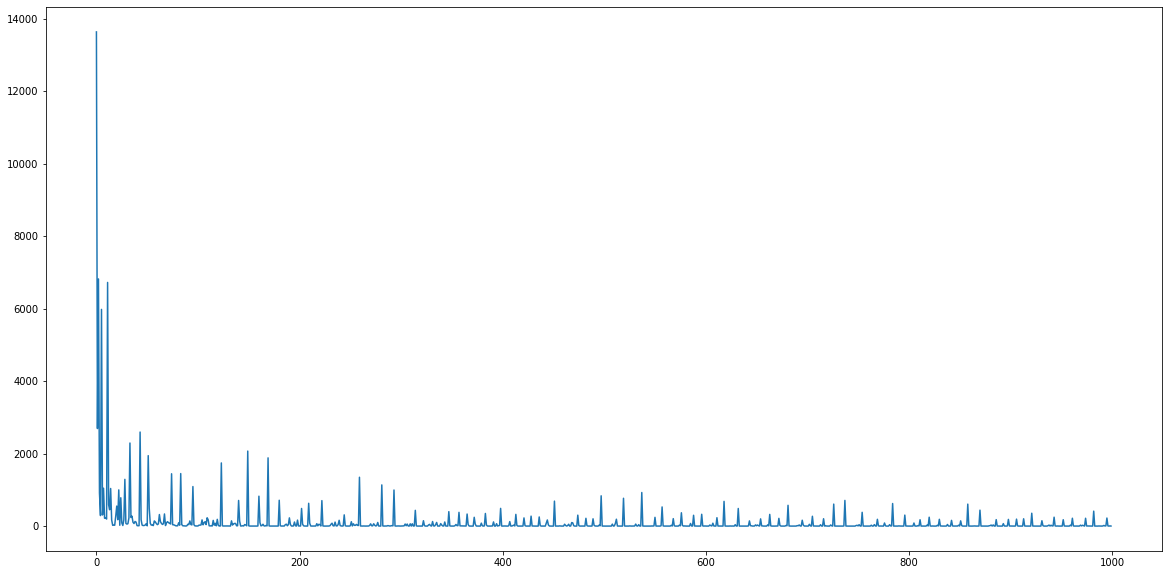

    model_path=/sharehouse/DATA/SMART_FACTORY/ckim/model/mlp-data_up.model is saved


<Figure size 432x288 with 0 Axes>

In [31]:
training(model, train_loader)

In [32]:
model.eval()

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=2048, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2048, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=32, bias=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=1, bias=True)
)

In [33]:
model.load_state_dict(torch.load(model_name))

<All keys matched successfully>

In [34]:
testing(model, test_loader, 10.)
testing(model, test_loader, 30.)


Testing is Started 
model is loaded
3399 3399
[[106.99383544921875], [132.00035095214844], [394.0633850097656], [248.01026916503906], [108.16749572753906], [208.0231475830078], [104.97233581542969], [68.84010314941406], [266.4130554199219], [109.17469787597656]]
[[107.0], [132.0], [394.0], [248.0], [108.0], [208.0], [105.0], [69.0], [266.0], [109.0]]
평균제곱근오차 1.814648910600015
결정계수 0.9999848136206144
hit ratio with error range(10.00) = 0.9988, no of errors = 4, total = 3399

Testing is Started 
model is loaded
3399 3399
[[106.99383544921875], [132.00035095214844], [394.0633850097656], [248.01026916503906], [108.16749572753906], [208.0231475830078], [104.97233581542969], [68.84010314941406], [266.4130554199219], [109.17469787597656]]
[[107.0], [132.0], [394.0], [248.0], [108.0], [208.0], [105.0], [69.0], [266.0], [109.0]]
평균제곱근오차 1.814648910600015
결정계수 0.9999848136206144
hit ratio with error range(30.00) = 0.9991, no of errors = 3, total = 3399


In [35]:
testing2(model, test_loader, X2_mean, X3_mean, X4_mean, X1_d1_mean, X1_d2_mean, X3_d1_mean, X3_d2_mean, 10.)
testing2(model, test_loader, X2_mean, X3_mean, X4_mean, X1_d1_mean, X1_d2_mean, X3_d1_mean, X3_d2_mean, 30.)


Testing is Started 
model is loaded
3399 3399
평균제곱근오차 438.20220595330267
결정계수 -18.355858069648313
hit ratio with error range(10.00) = 0.0415, no of errors = 3258, total = 3399

Testing is Started 
model is loaded
3399 3399
평균제곱근오차 438.20220595330267
결정계수 -18.355858069648313
hit ratio with error range(30.00) = 0.1242, no of errors = 2977, total = 3399


In [36]:
ran = [200, 400, 600, 800, 1000]
for i in ran:
    print(i, x_test[i], y_test[i])
    print(i-1, x_test[i-1], y_test[i-1])
    print('    mean = ', x_test[i-5:i].mean(axis=0))
print()


200 [ 15.   5.  45.  10. -75. -74. -35.  34.] 75.0
199 [ 84.   5. 138.  10.  15. -22. 129.  36.] 237.0
    mean =  [132.6   5.   71.8  10.   38.6   6.8  15.6 -68.6]
400 [  86.    5.   19.   10.  -17.   44. -149.  -63.] 120.0
399 [ 98.   5. 198.  10.   0.  46.   0. 166.] 311.0
    mean =  [ 96.2   5.  101.2  10.  -14.6  30.2  11.8  73.2]
600 [116.   5. 194.  10.  93.  93. 179. 179.] 325.0
599 [ 37.   5.  52.  10.   1.   1. -52. -52.] 104.0
    mean =  [189.6   5.  145.8  10.   90.8  79.  -23.2  75.2]
800 [521.   5. 206.  10.   0. 429.   0. 180.] 742.0
799 [ 119.    5.   60.   10. -189.  -39.   46. -141.] 194.0
    mean =  [108.    5.   34.4  10.  -58.6  13.2 -13.2 -34.4]
1000 [157.   5. 211.  10.   0.   0.   0.   0.] 383.0
999 [ 194.    5. 3654.   10.    0.   61.    0. 3646.] 3863.0
    mean =  [129.2   5.  784.6  10.   -6.6  28.4 -14.8 575.2]



Sample test

In [37]:
X1_val = 169.
X2_val = 5.
X3_val = 13.
X4_val = 10.
Y0_val = 197.
X1_d1_val = 101.
X3_d1_val = 93.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
X1_d2_val = X1_d2_mean
X3_d2_val = X3_d2_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val, X1_d2_val, X3_d2_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])
X2_val = 5
X3_val = 18
X4_val = 10
X1_d1_val = 89
X3_d1_val = 18
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=169.00, X2=5.00, X3=13.00, X4=10.00, Y0=197.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 8x64)

In [39]:
X1_val = 29.
X2_val = 5.
X3_val = 28.
X4_val = 10.
Y0_val = 72.
X1_d1_val = 154.
X1_d2_val = 29.
X3_d1_val = 12.
X3_d2_val = 28.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 375.
X4_val = 10.
X1_d1_val = 48.
X3_d1_val = 57
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=29.00, X2=5.00, X3=28.00, X4=10.00, Y0=72.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)

In [40]:
X1_val = 117.
X2_val = 5.
X3_val = 126.
X4_val = 10.
Y0_val = 258.
X1_d1_val = 76.
X3_d1_val = 17.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 105.
X4_val = 10.
X1_d1_val = 122.
X1_d2_val = 66.
X3_d1_val = 85.
X3_d2_val = 9.
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=117.00, X2=5.00, X3=126.00, X4=10.00, Y0=258.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)

In [41]:
X1_val = 95.
X2_val = 5.
X3_val = 6.
X4_val = 10.
Y0_val = 116.
X1_d1_val = 175.
X3_d1_val = 11.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val, X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 17.
X4_val = 10.
X1_d1_val = 167.
X3_d1_val = 17.
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=95.00, X2=5.00, X3=6.00, X4=10.00, Y0=116.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)

In [42]:
X1_val = 152.
X2_val = 5.
X3_val = 55.
X4_val = 10.
Y0_val = 222.
X1_d1_val = 282.
X3_d1_val = 259.
print('X1={:.2f}, X2={:.2f}, X3={:.2f}, X4={:.2f}, Y0={:.2f}'.format(X1_val, X2_val, X3_val,X4_val,Y0_val))
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X1, X2, X3, X4 are known value, ', predict_val[0])
X2_val = X2_mean
X3_val = X3_mean
X4_val = X4_mean
X1_d1_val = X1_d1_mean
X3_d1_val = X3_d1_mean
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X2_val = 5.
X3_val = 55.
X4_val = 10.
X1_d1_val = 382.
X3_d1_val = 359.
my_value = torch.FloatTensor([[X1_val, X2_val, X3_val, X4_val, X1_d1_val, X3_d1_val]])
my_predict = model(my_value).detach().numpy()
predict_val = np.ravel(my_predict)
print('X2, X3, X4 are mean value, ', predict_val[0])

X1=152.00, X2=5.00, X3=55.00, X4=10.00, Y0=222.00


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 4x64)